In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#I want to ignore the warning messages.
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\atabe\\Courses\\Prediction with Machine Learning\\Assignment 1'

In [4]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 12A1-CFF2

 Directory of C:\Users\atabe\Courses\Prediction with Machine Learning\Assignment 1

20.01.2023  23:36    <DIR>          .
19.01.2023  20:20    <DIR>          ..
19.01.2023  20:20    <DIR>          .ipynb_checkpoints
19.01.2023  20:43        30.670.634 morg-2014-emp.csv
19.01.2023  20:19        37.035.318 morg-2014-emp.dta
20.01.2023  23:36            91.179 Prediction Assignment 1.ipynb
               3 File(s)     67.797.131 bytes
               3 Dir(s)  103.084.363.776 bytes free


In [5]:
#df_all = pd.read_stata('morg-2014-emp.dta')
df_all = pd.read_csv('morg-2014-emp.csv')

In [6]:
print(df_all.columns, len(df_all.columns))

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object') 23


In [7]:
df_all.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [8]:
df_all.groupby(['prcitshp'])['earnwke'].mean()
df_all.groupby(['ind02'])['earnwke'].mean()
df_all.groupby(['class'])['earnwke'].mean()

class
Government - Federal    1247.119446
Government - Local       931.971177
Government - State       933.664266
Private, For Profit      862.265601
Private, Nonprofit       926.810107
Name: earnwke, dtype: float64

In [9]:
df_all.describe()

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012
count,149316.000000,1.493160e+05,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000,20071.000000,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000
mean,158796.895095,4.510656e+14,2375.618819,888.834343,38.939819,40.807958,1.424456,2.549250,40.706810,1.493839,3.461250,0.643729,1.770935,4161.185640
std,91294.406095,3.227225e+14,1295.345801,643.737322,10.259280,2.502888,1.333825,2.382705,12.776095,0.499964,2.740185,1.022607,3.075455,2570.644535
min,3.000000,5.893210e+09,53.232500,0.010000,1.000000,31.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,10.000000
25%,79751.500000,1.368508e+14,1271.730300,430.000000,40.000000,39.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,2200.000000
50%,158971.500000,4.114799e+14,2662.681950,719.600000,40.000000,40.000000,1.000000,1.000000,41.000000,1.000000,1.000000,0.000000,0.000000,4220.000000
75%,237719.250000,7.340299e+14,3319.093575,1153.840000,40.000000,43.000000,1.000000,4.000000,52.000000,2.000000,7.000000,1.000000,3.000000,5700.000000
max,317056.000000,9.999907e+14,24595.832400,2884.610000,99.000000,46.000000,26.000000,8.000000,64.000000,2.000000,7.000000,10.000000,15.000000,9750.000000


In [10]:
vocations = {830: 'credit analysts',
             840: 'financial analyst', 
             950: 'unclassified financial',
             1610: 'biologists', 
             1700: 'physicists',
             1720: 'chemists', 
             1760: 'physical scientists, other',
             1910: 'biological technicians',
             1920: 'chemical technicians',
             1965: 'misc. science technicians'}

In [11]:
for i in vocations.keys():
    print('Number of ', vocations[i],'(vocation code:', i,')', 'in the database is: ')
    print(df_all.loc[df_all['occ2012']==i]['occ2012'].value_counts())

Number of  credit analysts (vocation code: 830 ) in the database is: 
830    39
Name: occ2012, dtype: int64
Number of  financial analyst (vocation code: 840 ) in the database is: 
840    253
Name: occ2012, dtype: int64
Number of  unclassified financial (vocation code: 950 ) in the database is: 
950    98
Name: occ2012, dtype: int64
Number of  biologists (vocation code: 1610 ) in the database is: 
1610    155
Name: occ2012, dtype: int64
Number of  physicists (vocation code: 1700 ) in the database is: 
1700    13
Name: occ2012, dtype: int64
Number of  chemists (vocation code: 1720 ) in the database is: 
1720    113
Name: occ2012, dtype: int64
Number of  physical scientists, other (vocation code: 1760 ) in the database is: 
1760    233
Name: occ2012, dtype: int64
Number of  biological technicians (vocation code: 1910 ) in the database is: 
1910    21
Name: occ2012, dtype: int64
Number of  chemical technicians (vocation code: 1920 ) in the database is: 
1920    78
Name: occ2012, dtype: int

I will merge occupations:

In [12]:
for i in vocations.keys():
    print(vocations[i])

credit analysts
financial analyst
unclassified financial
biologists
physicists
chemists
physical scientists, other
biological technicians
chemical technicians
misc. science technicians


In [13]:
for i in vocations.keys():
    df_all.loc[df_all['occ2012'] == i, 'sample'] = 1

In [14]:
df_all.loc[df_all['sample'].isna(), 'sample'] = 0

In [15]:
df = df_all[df_all["sample"] == 1]

In [16]:
### create subset of dataset based on sample = 1 and then group by vocation code
df.groupby(['occ2012'])['earnwke'].mean()

occ2012
830     1301.262051
840     1505.364704
950     1147.434082
1610    1284.034645
1700    1579.718462
1720    1356.039204
1760    1561.383047
1910     923.260952
1920     905.267821
1965     790.352927
Name: earnwke, dtype: float64

In [17]:
### AT SOME POINT GET BACK HERE AND CHECK FOR MISSING VALUES IN VARIABLES YOU USED IN REGRESSIONS!!!

In [18]:
df['sex'].head()

176     1
182     2
584     2
982     2
1145    2
Name: sex, dtype: int64

In [19]:
print(df.columns, len(df.columns))

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94', 'sample'],
      dtype='object') 24


In [20]:
df.describe()

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012,sample
count,1208.000000,1.208000e+03,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,71.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.0
mean,166991.643212,4.386563e+14,2268.293755,1268.769156,41.379139,42.961921,1.569536,3.450704,40.154801,1.445364,3.424669,0.643212,1.624172,1495.674669,1.0
std,90910.512543,3.189230e+14,1332.492694,705.617987,8.562957,1.961149,1.479537,2.812161,11.983904,0.497212,2.792929,1.005051,2.790292,448.293483,0.0
min,408.000000,1.101921e+11,149.658300,1.000000,3.000000,33.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,830.000000,1.0
25%,88128.750000,1.145878e+14,1041.298300,768.865000,40.000000,43.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,950.000000,1.0
50%,172793.500000,4.083096e+14,2589.543200,1151.500000,40.000000,43.000000,1.000000,2.000000,39.000000,1.000000,1.000000,0.000000,0.000000,1720.000000,1.0
75%,246141.500000,7.100322e+14,3308.350250,1634.610000,40.000000,44.000000,1.000000,7.000000,50.000000,2.000000,7.000000,1.000000,3.000000,1910.000000,1.0
max,316774.000000,9.998202e+14,7411.615800,2884.610000,99.000000,46.000000,21.000000,8.000000,64.000000,2.000000,7.000000,7.000000,15.000000,1965.000000,1.0


In [21]:

#Creating the dependent variable
df['wage'] = df['earnwke'] / df['uhours']

#Creating square of age variable
df['agesq'] = df['age']**2

#
df['agecube'] = df['age']**3

#Dummies for gender (male=1, female=2, see documentation)
sex = pd.get_dummies(df['sex'], drop_first=True, prefix='sx')

#Dummies for race
race = pd.get_dummies(df['race'], drop_first=True, prefix='rc')

#Dummies for marital status
marital = pd.get_dummies(df['marital'], drop_first=True, prefix='mr')

#
occupation = pd.get_dummies(df['occ2012'], drop_first=True, prefix='occu')

#
classes = pd.get_dummies(df['class'], drop_first=True, prefix='cls')


df = pd.concat([df, sex, race, marital, classes], axis=1)

#
df['age*sex'] = df['age']*df['sx_2']

df['ownchild*sex'] = df['ownchild']*df['sx_2']

#df['race*sex'] = df.filter(regex=('rc.*'))*df['sx_2']

#df = pd.concat([df, pd.get_dummies(df[["race", "sex"]]).mul(1, axis=1)], axis=1)



In [22]:
df.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94', 'sample', 'wage', 'agesq',
       'agecube', 'sx_2', 'rc_2', 'rc_3', 'rc_4', 'rc_5', 'rc_6', 'rc_7',
       'rc_8', 'rc_15', 'rc_21', 'mr_2', 'mr_3', 'mr_4', 'mr_5', 'mr_6',
       'mr_7', 'cls_Government - Local', 'cls_Government - State',
       'cls_Private, For Profit', 'cls_Private, Nonprofit', 'age*sex',
       'ownchild*sex'],
      dtype='object')

In [23]:
df.filter(regex=('sx_.*')) #sx_2 = 1 means female

,sx_2
176,0
182,1
584,1
982,1
1145,1
...,...
148884,0
149082,0
149091,1
149175,0


In [24]:
#data1 = df[['wage','age','sx_2']]
data1 = pd.concat([df['wage'], df['age'], sex], axis=1)

In [25]:
data1

,wage,age,sx_2
176,41.346000,44,0
182,36.842105,39,1
584,37.500000,35,1
982,25.700000,44,1
1145,29.290000,55,1
...,...,...,...
148884,34.855625,55,0
149082,21.500000,30,0
149091,32.051250,55,1
149175,25.000000,34,0


In [26]:
data2 = pd.concat([data1, df['agesq'], marital], axis=1)

In [27]:
data2 

,wage,age,sx_2,agesq,mr_2,mr_3,mr_4,mr_5,mr_6,mr_7
176,41.346000,44,0,1936,0,1,0,0,0,0
182,36.842105,39,1,1521,0,0,0,0,0,1
584,37.500000,35,1,1225,0,0,0,0,0,0
982,25.700000,44,1,1936,0,0,0,0,0,1
1145,29.290000,55,1,3025,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
148884,34.855625,55,0,3025,0,0,0,1,0,0
149082,21.500000,30,0,900,0,0,0,0,0,0
149091,32.051250,55,1,3025,0,0,0,0,0,0
149175,25.000000,34,0,1156,0,0,0,0,0,0


In [28]:
data3 = pd.concat([data2, race, df['age*sex']], axis=1)

In [29]:
data3

,wage,age,sx_2,agesq,mr_2,mr_3,mr_4,mr_5,mr_6,mr_7,rc_2,rc_3,rc_4,rc_5,rc_6,rc_7,rc_8,rc_15,rc_21,age*sex
176,41.346000,44,0,1936,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,36.842105,39,1,1521,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,39
584,37.500000,35,1,1225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35
982,25.700000,44,1,1936,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,44
1145,29.290000,55,1,3025,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148884,34.855625,55,0,3025,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
149082,21.500000,30,0,900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149091,32.051250,55,1,3025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55
149175,25.000000,34,0,1156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
data4 = pd.concat([data3, df['ownchild'], df['ownchild*sex'], df['agecube'], 
                   occupation, classes], axis=1)

In [31]:
data4

,wage,age,sx_2,agesq,mr_2,mr_3,mr_4,mr_5,mr_6,mr_7,...,occu_1700,occu_1720,occu_1760,occu_1910,occu_1920,occu_1965,cls_Government - Local,cls_Government - State,"cls_Private, For Profit","cls_Private, Nonprofit"
176,41.346000,44,0,1936,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
182,36.842105,39,1,1521,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
584,37.500000,35,1,1225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
982,25.700000,44,1,1936,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1145,29.290000,55,1,3025,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148884,34.855625,55,0,3025,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
149082,21.500000,30,0,900,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
149091,32.051250,55,1,3025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
149175,25.000000,34,0,1156,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


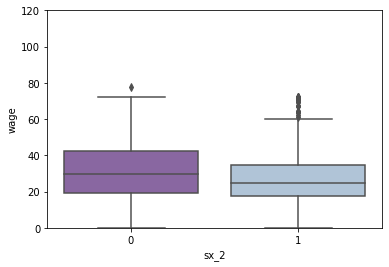

In [32]:
sns.boxplot(x='sx_2', y='wage', data=data1, palette='BuPu_r')
plt.ylim(0, 120)
plt.show()

## Build 4 models, increasing in complexity from Model 1 to Model 4

Models should use OLS. Choice of predictors should be explained.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Compare the performance of these models using:
- (a) RMSE in the full sample,
- (b) Cross-validated RMSE,
- (c) BIC in the full sample.

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [41]:
data_list = [data1, data2, data3, data4]

for i, data in enumerate(data_list):
    X = data.drop('wage',axis=1)
    y = data['wage']
    reg = LinearRegression()
    scores = cross_val_score(reg, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores= np.sqrt(-scores)
    print('Model',i+1,'mean cross-validated RMSE:')
    print(rmse_scores.mean())

Model 1 mean cross-validated RMSE:
16.009093101355393
Model 2 mean cross-validated RMSE:
15.614272381970718
Model 3 mean cross-validated RMSE:
15.437486050016366
Model 4 mean cross-validated RMSE:
14.733184185091385


In [44]:
from sklearn.metrics import mean_squared_error

for i, data in enumerate(data_list):
    X = data.drop('wage',axis=1)
    y = data['wage']
    seed = 424211
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    scores = mean_squared_error(y_test, predictions, squared=False)
    print('Model',i+1,'RMSE:')
    print(scores)

Model 1 RMSE:
14.587017946911093
Model 2 RMSE:
14.25237652789696
Model 3 RMSE:
14.096202559804434
Model 4 RMSE:
12.989374632721116


In [45]:
from math import log

def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

for i, data in enumerate(data_list):
    X = data.drop('wage',axis=1)
    y = data['wage']
    seed = 4223
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    mse = mean_squared_error(y_test, predictions, squared=True)
    num_params = len(reg.coef_) + 1
    scores = calculate_bic(len(y_test), mse, num_params)
    print('Model',i+1,'BIC:')
    print(scores)

Model 1 BIC:
1794.897364536284
Model 2 BIC:
1818.6440686551905
Model 3 BIC:
1873.4156805436476
Model 4 BIC:
1952.9923355262702


In [38]:
#Chat-GPT help sought below
# Model names
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Mean cross-validated RMSE values
rmse_cv_values = [16.082, 15.773, 15.589, 14.816]

# Mean RMSE values
rmse_values = [15.438, 15.083, 14.930, 14.202]

# BIC values
bic_values = [1670.193, 1696.124, 1747.048, 1785.404]

# Create a dictionary with the values
data = {'Model': models, 'Mean 5-fold CV RMSE': rmse_cv_values, 'RMSE': rmse_values, 'BIC': bic_values}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the table
df


,Model,Mean 5-fold CV RMSE,RMSE,BIC
0,Model 1,16.082,15.438,1670.193
1,Model 2,15.773,15.083,1696.124
2,Model 3,15.589,14.930,1747.048
3,Model 4,14.816,14.202,1785.404


## Discuss the relationship between model complexity and performance

Except for according to BIC, model performance seems to be increasing with complexity in this case.
RMSE and BIC here are calculated on the test dataset which the model has never seen and the other RMSE metrics is calculated using 5-fold cross-validation across the whole dataset (pre-train/test split).

Although we know that as model complexity increases, performance on 'hold-out' data should decrease due to overfitting. My explanation is that even the Model 4 here is not too complex. Hence, there may still be room for adding more features and increase performance on live data since the performance on the test set does not yet hint overfitting.

Before making concrete conclusions these results can be checked if they are robust to:
- different seeds,
- different proportions for train/test splits,
- algorithmic feature selection using a model like LASSO or RIDGE for even more complex models.

PS: I am not 100% sure of my calculation of Bayesian Information Criteria. The increase even from Model 1 to Model 2 seems counter intuitive. Regardless, the points discussed here should hold.